In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!yes | unzip pickle.zip

Mounted at /content/drive
unzip:  cannot find or open pickle.zip, pickle.zip.zip or pickle.zip.ZIP.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# with tf.keras.utils.custom_object_scope({'WeightedMSELoss': WeightedMSELoss}):
#     model = tf.keras.models.load_model(f'model1_vgg_generic_weighted_epochs_23122023')

model_path = f'/content/drive/MyDrive/DNA_NET_GENERAL_MODEL_SMALL_HIGH_ERROR'

model = tf.keras.models.load_model(model_path)

In [ ]:
def dna_sequence_to_numeric(dna_sequence_list):
    base_mapping = {"A": 0, "C": 1, "G": 2, "T": 3}
    num_sequences = len(dna_sequence_list)
    max_sequence_length = max(len(seq) for seq in dna_sequence_list)

    # Initialize a 2D NumPy array filled with zeros
    numeric_array = np.zeros((num_sequences, max_sequence_length), dtype=int)

    for i, seq in enumerate(dna_sequence_list):
        for j, base in enumerate(seq):
            numeric_array[i, j] = base_mapping.get(base, -1)

    return numeric_array

# Data Generation
## Simulation

In [ ]:
#from VCDataGenerator import generate_data_for_noise_reduction, generate_random_clones, simulate_read
import time
import numpy as np
import matplotlib.pyplot as plt
import VariantCallingMini as vc

# OOP Python
dg = vc.VariantCallingDataMini()
start = time.time()
noisy, clean, _ = dg.generate_data_for_noise_reduction(1, 100, 0.001, 0.001)

noisy_list = np.vectorize(dg.reverse_transdict.get)(noisy)[0]
clean_list = np.vectorize(dg.reverse_transdict.get)(clean)[0]

## Here is pickle-generated

In [ ]:
import PickleUtil
import random
from importlib import reload
reload(PickleUtil)

#clone_list_file = "crt_clones.txt"
clone_list_file = "rbm_clones_200.txt"
#clone_names = ["3D7","7G8","DD2"]
clone_names = ["WUHAN","ALPHA","DELTA","OMICRON"]
sequence = "RBM200"
with open(clone_list_file) as file:
    clone_list = [line.rstrip() for line in file]

pk = PickleUtil.PickleLoader(clones=clone_names,sequence = sequence)
crt_pickles = pk.load_pickle()

noisy = []
clean = []

for _ in range(0,100):
    clone_idx = random.randint(0,2)
    noisy.append(crt_pickles[clone_idx][random.randint(0,len(crt_pickles[clone_idx]))])
    clean.append(clone_list[clone_idx])
noisy = [dna_sequence_to_numeric(noisy)]
clean = [dna_sequence_to_numeric(clean)]
print(noisy)
print(clean)

ValueError: Currently supported are: ('CRT', 'DHPS', 'DHFR')

In [ ]:
# Read the input files
nucleotides = ["A","T","G","C"]
A = [0,0,0,0]
T = [0,0,0,0]
G = [0,0,0,0]
C = [0,0,0,0]

for i in range(len(clean_list)):
    cur_clean = list(clean_list[i])
    cur_noisy = list(noisy_list[i])
    for j in range(len(cur_clean)):
        if cur_clean[j] == "A":
            A[nucleotides.index(cur_noisy[j])] += 1
        elif cur_clean[j] == "T":
            T[nucleotides.index(cur_noisy[j])] += 1
        elif cur_clean[j] == "G":
            G[nucleotides.index(cur_noisy[j])] += 1
        elif cur_clean[j] == "C":
            C[nucleotides.index(cur_noisy[j])] += 1

print(A)
print(T)
print(G)
print(C)

print([x / sum(A) for x in A])
print([x / sum(T) for x in T])
print([x / sum(G) for x in G])
print([x / sum(C) for x in C])

[4067, 125, 105, 102]
[123, 5066, 141, 123]
[107, 135, 4125, 87]
[100, 123, 76, 3195]
[0.9245283018867925, 0.028415548988406456, 0.023869061150261422, 0.02318708797453967]
[0.022556390977443608, 0.9290298918026775, 0.025857326242435356, 0.022556390977443608]
[0.02402334979793444, 0.030309833857207005, 0.9261338123035474, 0.01953300404131118]
[0.028620492272467088, 0.03520320549513452, 0.021751574127074985, 0.9144247281053234]


# Here we start the inference running

In [ ]:
syn_image_sameple = np.array(noisy).astype('float32') / 3
syn_image_sameple = syn_image_sameple.reshape(syn_image_sameple.shape[0], 100, 178, 1)
padding_config = ((0, 0), (0, 0), (0, 22), (0, 0))  # (before, after) for each dimension
syn_image_sameple = np.pad(syn_image_sameple, padding_config, mode='constant', constant_values=1)
syn_image_sameple.shape

(1, 100, 200, 1)

In [ ]:
denoised_image = np.rint(model.predict(syn_image_sameple)*3).reshape(1,100,200)[:,:,:178]

1/1 [==============================] - 3s 3s/step


In [ ]:
print(np.shape(noisy))
print(np.shape(denoised_image))

(1, 100, 178)
(1, 100, 178)


In [ ]:
#print("OOP Python time taken: ", time.time() - start)
print(noisy)
print(np.vectorize(dg.reverse_transdict.get)(noisy))
print(np.vectorize(dg.reverse_transdict.get)(clean))

noisy_char = np.vectorize(dg.reverse_transdict.get)(noisy)[0]
clean_char = np.vectorize(dg.reverse_transdict.get)(clean)[0]
denoised_char = np.vectorize(dg.reverse_transdict.get)(denoised_image)[0]
with open("noisy.fasta","w") as text_output:
    for i in range(len(noisy_char)):
        text_output.write(">"+str(i)+"\n")
        #print(noisy_char[i])
        text_output.write(''.join(list(noisy_char[i])))
        text_output.write('\n')

with open("clean.fasta","w") as text_output:
    for i in range(len(clean_char)):
        text_output.write(">"+str(i)+"\n")
        text_output.write(''.join(list(clean_char[i])))
        text_output.write('\n')

with open("denoised.fasta","w") as text_output:
    for i in range(len(denoised_char)):
        text_output.write(">"+str(i)+"\n")
        text_output.write(''.join(list(denoised_char[i])))
        text_output.write('\n')

[[[3 3 2 ... 0 0 2]
  [3 3 2 ... 0 2 1]
  [3 3 2 ... 0 0 2]
  ...
  [3 3 2 ... 0 0 2]
  [3 3 2 ... 0 0 2]
  [3 3 2 ... 0 0 2]]]
[[['T' 'T' 'G' ... 'A' 'A' 'G']
  ['T' 'T' 'G' ... 'A' 'G' 'C']
  ['T' 'T' 'G' ... 'A' 'A' 'G']
  ...
  ['T' 'T' 'G' ... 'A' 'A' 'G']
  ['T' 'T' 'G' ... 'A' 'A' 'G']
  ['T' 'T' 'G' ... 'A' 'A' 'G']]]
[[['T' 'T' 'G' ... 'A' 'A' 'G']
  ['T' 'T' 'G' ... 'A' 'A' 'G']
  ['T' 'T' 'G' ... 'A' 'A' 'G']
  ...
  ['T' 'T' 'G' ... 'A' 'A' 'G']
  ['T' 'T' 'G' ... 'A' 'A' 'G']
  ['T' 'T' 'G' ... 'A' 'A' 'G']]]


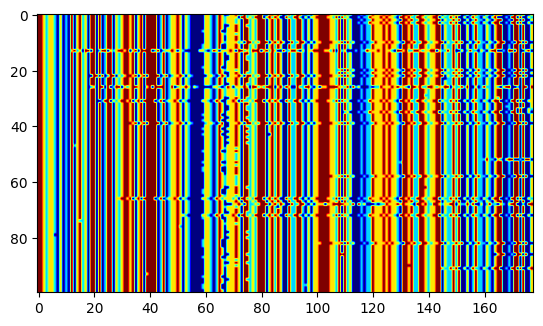

In [ ]:
reshaped_test_data = np.round(noisy[0] * 3).reshape(100,178)
plt.imshow(reshaped_test_data, cmap="jet")
plt.show()

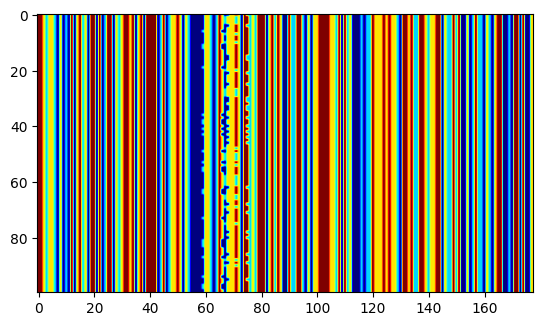

In [ ]:
reshaped_test_data = np.round(clean[0] * 3).reshape(100,178)
plt.imshow(reshaped_test_data, cmap="jet")
plt.show()

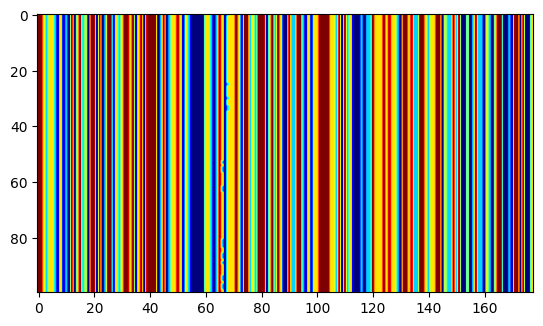

In [ ]:
reshaped_test_data = np.round(denoised_image[0] * 3).reshape(100,178)
plt.imshow(reshaped_test_data, cmap="jet")
plt.show()

# Generating DUDE-Seq Denoised Data

In [ ]:
!git clone https://github.com/datasnu/dude-seq
!sudo apt-get install libboost-dev libgsl0-dev liblapack-dev zlib1g-dev
!sudo mv /content/dude-seq/* /content
!mkdir bin/
!sudo make && make install

fatal: destination path 'dude-seq' already exists and is not an empty directory.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgsl-dev' instead of 'libgsl0-dev'
libboost-dev is already the newest version (1.74.0.3ubuntu7).
liblapack-dev is already the newest version (3.10.0-2ubuntu1).
libgsl-dev is already the newest version (2.7.1+dfsg-3).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-2ubuntu9.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
mv: cannot stat '/content/dude-seq/*': No such file or directory
mkdir: cannot create directory ‘bin/’: File exists
(cd DUDE-Seq-1 && make)
make[1]: Entering directory '/content/DUDE-Seq-1'
make[1]: Nothing to be done for 'all'.
make[1]: Leaving directory '/content/DUDE-Seq-1'
(cd DUDE-Seq-2 && make)
make[1]: Entering directory '/content/DUDE-Seq-2'
make[1]: Nothing to be done for 'all'.
make[1]: Leaving directory '/content/DUDE-Seq-2'
cp DUDE-Seq-1

In [ ]:
!pwd
#!dude-seq/DUDE-Seq-all.sh [DAT_FILE]
#!./DUDE-Seq-1.sh /content/Example/Artificial.fasta
#!./DUDE-Seq-1.sh /content/noisy-5.fasta
!./bin/DUDE-Seq-1 -i /content/noisy.fasta -p /content/noise_model_0_001.pi -k 5 -o /content/noisy_S5.fasta
#!./bin/DUDE-Seq-1 -i /content/noisy.fasta -o /content/noisy_D2_K2.fasta -k 2

/content
Getting noise distribution...
Correcting errors...

Elapsed time: 0.051904s


In [ ]:
noisy_in = "noisy.fasta"
clean_in = "clean.fasta"

# Evaluations
## DUDE-Seq Evaluation

In [ ]:
denoised_in = "noisy_S5.fasta"
denoised_dude_seq = []
with open(noisy_in) as file:
    noisy_list = [line.rstrip() for line in file]
with open(denoised_in) as file:
    denoised_list = [line.rstrip() for line in file]
with open(clean_in) as file:
    clean_list = [line.rstrip() for line in file]

num_aligned_bases_in_raw = 0
num_mismatched_bases_in_raw = 0
num_aligned_bases_in_denoised = 0
num_mismatched_bases_in_denoised = 0
total_bases = 0

print("Length of clean_list: ", len(clean_list))
print("Length of denoised_list: ", len(denoised_list))
print("Length of noisy_list: ", len(noisy_list))

for i in range(len(clean_list)):
  if ">" not in clean_list[i]:
    cur_clean = list(clean_list[i])
    cur_noisy = list(noisy_list[i])
    cur_denoised = list(denoised_list[i])
    denoised_dude_seq.append(cur_denoised)
    for j in range(len(cur_clean)):
        num_aligned_bases_in_raw += 1
        num_aligned_bases_in_denoised += 1
        if cur_noisy[j] != cur_clean[j]:
            num_mismatched_bases_in_raw += 1
        if cur_denoised[j] != cur_clean[j]:
            num_mismatched_bases_in_denoised += 1
        total_bases += 1
print("num_aligned_bases_in_raw: ", num_aligned_bases_in_raw)
print("num_mismatched_bases_in_raw: ", num_mismatched_bases_in_raw)
print("num_aligned_bases_in_denoised: ", num_aligned_bases_in_denoised)
print("num_mismatched_bases_in_denoised: ", num_mismatched_bases_in_denoised)
print("total_bases: ", total_bases)


e_raw = num_mismatched_bases_in_raw/num_aligned_bases_in_raw
e_tool = num_mismatched_bases_in_denoised/num_aligned_bases_in_denoised

g_tool = (num_aligned_bases_in_denoised-num_aligned_bases_in_raw)/num_aligned_bases_in_raw

e_adj_tool = ((1+g_tool)*e_tool) - (g_tool*e_raw)
g_adj_tool = (e_raw - e_adj_tool)/e_raw

print("e_raw: ",e_raw)
print("e_tool: ", e_tool)
print("g_tool: ", g_tool)
print("e_adj_tool: ", e_adj_tool)
print("g_adj_tool: ", g_adj_tool)

denoised_dude_seq = np.vectorize(dg.transdict.get)(denoised_dude_seq)

reshaped_test_data = np.round(denoised_dude_seq * 3).reshape(100,200)
plt.imshow(reshaped_test_data, cmap="jet")
plt.show()

Length of clean_list:  200
Length of denoised_list:  200
Length of noisy_list:  200
num_aligned_bases_in_raw:  17800
num_mismatched_bases_in_raw:  1347
num_aligned_bases_in_denoised:  17800
num_mismatched_bases_in_denoised:  1329
total_bases:  17800
e_raw:  0.07567415730337079
e_tool:  0.0746629213483146
g_tool:  0.0
e_adj_tool:  0.0746629213483146
g_adj_tool:  0.013363028953229482


ValueError: cannot reshape array of size 17800 into shape (100,200)

In [ ]:
print(len(clean_list))
print(len(denoised_list))
print(len(noisy_list))
print(num_aligned_bases_in_raw)
print(num_mismatched_bases_in_raw)
print(num_aligned_bases_in_denoised)
print(num_mismatched_bases_in_denoised)
print(total_bases)
print(e_raw)
print(e_tool)
print(g_tool)
print(e_adj_tool)
print(g_adj_tool)

200
200
200
20000
9948
20000
9938
20000
0.4974
0.4969
0.0
0.4969
0.0010052271813429845


## ML Denoiser Eval

In [ ]:
denoised_in = "denoised.fasta"
with open(noisy_in) as file:
    noisy_list = [line.rstrip() for line in file]
with open(denoised_in) as file:
    denoised_list = [line.rstrip() for line in file]
with open(clean_in) as file:
    clean_list = [line.rstrip() for line in file]

num_aligned_bases_in_raw = 0
num_mismatched_bases_in_raw = 0
num_aligned_bases_in_denoised = 0
num_mismatched_bases_in_denoised = 0
total_bases = 0

print("Length of clean_list: ", len(clean_list))
print("Length of denoised_list: ", len(denoised_list))
print("Length of noisy_list: ", len(noisy_list))

for i in range(len(clean_list)):
  if ">" not in clean_list[i]:
    cur_clean = list(clean_list[i])
    cur_noisy = list(noisy_list[i])
    cur_denoised = list(denoised_list[i])
    for j in range(len(cur_clean)):
        num_aligned_bases_in_raw += 1
        num_aligned_bases_in_denoised += 1
        if cur_noisy[j] != cur_clean[j]:
            num_mismatched_bases_in_raw += 1
        if cur_denoised[j] != cur_clean[j]:
            num_mismatched_bases_in_denoised += 1
        total_bases += 1
print("num_aligned_bases_in_raw: ", num_aligned_bases_in_raw)
print("num_mismatched_bases_in_raw: ", num_mismatched_bases_in_raw)
print("num_aligned_bases_in_denoised: ", num_aligned_bases_in_denoised)
print("num_mismatched_bases_in_denoised: ", num_mismatched_bases_in_denoised)
print("total_bases: ", total_bases)


e_raw = num_mismatched_bases_in_raw/num_aligned_bases_in_raw
e_tool = num_mismatched_bases_in_denoised/num_aligned_bases_in_denoised

g_tool = (num_aligned_bases_in_denoised-num_aligned_bases_in_raw)/num_aligned_bases_in_raw

e_adj_tool = ((1+g_tool)*e_tool) - (g_tool*e_raw)
g_adj_tool = (e_raw - e_adj_tool)/e_raw

print("e_raw: ",e_raw)
print("e_tool: ", e_tool)
print("g_tool: ", g_tool)
print("e_adj_tool: ", e_adj_tool)
print("g_adj_tool: ", g_adj_tool)

Length of clean_list:  200
Length of denoised_list:  200
Length of noisy_list:  200
num_aligned_bases_in_raw:  17800
num_mismatched_bases_in_raw:  1347
num_aligned_bases_in_denoised:  17800
num_mismatched_bases_in_denoised:  144
total_bases:  17800
e_raw:  0.07567415730337079
e_tool:  0.008089887640449439
g_tool:  0.0
e_adj_tool:  0.008089887640449439
g_adj_tool:  0.8930957683741649


In [ ]:
print(len(clean_list))
print(len(denoised_list))
print(len(noisy_list))
print(num_aligned_bases_in_raw)
print(num_mismatched_bases_in_raw)
print(num_aligned_bases_in_denoised)
print(num_mismatched_bases_in_denoised)
print(total_bases)
print(e_raw)
print(e_tool)
print(g_tool)
print(e_adj_tool)
print(g_adj_tool)

200
200
200
20000
9948
20000
4400
20000
0.4974
0.22
0.0
0.22
0.5577000402090873


# Main Loop

In [ ]:
generic_scores = []
tuned_scores = []
dude_seq_scores = []
dude_seq_k7_scores = []
dude_seq_k9_scores = []
dude_seq_k3_scores = []

In [ ]:
print("generic_scores: ", len(generic_scores))
print("tuned_scores: ", len(tuned_scores))
print("dude_seq_scores: ", len(dude_seq_scores))
print("dude_seq_k7_scores: ", len(dude_seq_k7_scores))
print("dude_seq_k9_scores: ", len(dude_seq_k9_scores))
print("dude_seq_k3_scores: ", len(dude_seq_k3_scores))

generic_scores:  67
tuned_scores:  67
dude_seq_scores:  67
dude_seq_k7_scores:  67
dude_seq_k9_scores:  67
dude_seq_k3_scores:  67


In [ ]:


model_path = f'/content/drive/MyDrive/DNA_NET_GENERAL_MODEL_SMALL_HIGH_ERROR'
#fine_tuned_mode_path = f'/content/drive/MyDrive/DNA_NET_SAR_CoV2_29012024_overfit'
fine_tuned_mode_path = f'/content/drive/MyDrive/DNA_NET_CRT_24012024'
source_pickle = False
model = tf.keras.models.load_model(model_path)
tuned_model = tf.keras.models.load_model(fine_tuned_mode_path)
clone_list_file = "crt_clones.txt"
#clone_list_file = "rbm_clones_200.txt"
clone_names = ["3D7","7G8","DD2"]
#clone_names = ["WUHAN","ALPHA","DELTA","OMICRON"]
seq_length = 178
#seq_length = 200
#sequence = "CRT"
#sequence = "RBM200"
sequence = "SIM"
if source_pickle:
    with open(clone_list_file) as file:
        clone_list = [line.rstrip() for line in file]
    pk = PickleUtil.PickleLoader(clones=clone_names,sequence = sequence)
    crt_pickles = pk.load_pickle()

noisy = []
clean = []

for j in range(0,100-len(generic_scores)):
    generic_score = []
    tuned_score = []
    dude_seq_score = []
    dude_seq_k7_score = []
    dude_seq_k9_score = []
    dude_seq_k3_score = []
    noisy = []
    clean = []
    if source_pickle:
        print("Sourcing from Pickles")
        for _ in range(0,100):
            clone_idx = random.randint(0,len(clone_names)-1)
            noisy.append(crt_pickles[clone_idx][random.randint(0,len(crt_pickles[clone_idx])-1)])
            clean.append(clone_list[clone_idx])
        noisy = [dna_sequence_to_numeric(noisy)]
        clean = [dna_sequence_to_numeric(clean)]
    else:
        # OOP Python
        print("Simulation")
        dg = vc.VariantCallingDataMini()
        start = time.time()
        noisy, clean, _ = dg.generate_data_for_noise_reduction(1, 100, 0.003, 0.003)


    syn_image_sameple = np.array(noisy).astype('float32') / 3
    syn_image_sameple = syn_image_sameple.reshape(syn_image_sameple.shape[0], 100, seq_length, 1)
    padding_config = ((0, 0), (0, 0), (0, (200-seq_length)), (0, 0))  # (before, after) for each dimension
    syn_image_sameple = np.pad(syn_image_sameple, padding_config, mode='constant', constant_values=1)
    syn_image_sameple.shape

    denoised_image = np.rint(model.predict(syn_image_sameple)*3).reshape(1,100,200)[:,:,:seq_length]
    denoised_tuned_image = np.rint(tuned_model.predict(syn_image_sameple)*3).reshape(1,100,200)[:,:,:seq_length]

    noisy_char = np.vectorize(dg.reverse_transdict.get)(noisy)[0]
    clean_char = np.vectorize(dg.reverse_transdict.get)(clean)[0]
    denoised_char = np.vectorize(dg.reverse_transdict.get)(denoised_image)[0]
    denoised_tuned_char = np.vectorize(dg.reverse_transdict.get)(denoised_tuned_image)[0]
    with open("noisy.fasta","w") as text_output:
        for i in range(len(noisy_char)):
            text_output.write(">"+str(i)+"\n")
            #print(noisy_char[i])
            text_output.write(''.join(list(noisy_char[i])))
            text_output.write('\n')

    with open("clean.fasta","w") as text_output:
        for i in range(len(clean_char)):
            text_output.write(">"+str(i)+"\n")
            text_output.write(''.join(list(clean_char[i])))
            text_output.write('\n')

    with open("denoised.fasta","w") as text_output:
        for i in range(len(denoised_char)):
            text_output.write(">"+str(i)+"\n")
            text_output.write(''.join(list(denoised_char[i])))
            text_output.write('\n')

    with open("denoised_tuned.fasta","w") as text_output:
        for i in range(len(denoised_tuned_char)):
            text_output.write(">"+str(i)+"\n")
            text_output.write(''.join(list(denoised_tuned_char[i])))
            text_output.write('\n')

    !pwd
    #!dude-seq/DUDE-Seq-all.sh [DAT_FILE]
    #!./DUDE-Seq-1.sh /content/Example/Artificial.fasta
    #!./DUDE-Seq-1.sh /content/noisy-5.fasta
    !./bin/DUDE-Seq-1 -i /content/noisy.fasta -p /content/noise_model_pickle.pi -k 5 -o /content/noisy_S5.fasta
    #!./bin/DUDE-Seq-1 -i /content/noisy.fasta -o /content/noisy_D2_K2.fasta -k 2

    noisy_in = "noisy.fasta"
    clean_in = "clean.fasta"

    denoised_in = "noisy_S5.fasta"
    denoised_dude_seq = []
    with open(noisy_in) as file:
        noisy_list = [line.rstrip() for line in file]
    with open(denoised_in) as file:
        denoised_list = [line.rstrip() for line in file]
    with open(clean_in) as file:
        clean_list = [line.rstrip() for line in file]

    num_aligned_bases_in_raw = 0
    num_mismatched_bases_in_raw = 0
    num_aligned_bases_in_denoised = 0
    num_mismatched_bases_in_denoised = 0
    total_bases = 0

    print("Length of clean_list: ", len(clean_list))
    print("Length of denoised_list: ", len(denoised_list))
    print("Length of noisy_list: ", len(noisy_list))

    for i in range(len(clean_list)):
      if ">" not in clean_list[i]:
        cur_clean = list(clean_list[i])
        cur_noisy = list(noisy_list[i])
        cur_denoised = list(denoised_list[i])
        denoised_dude_seq.append(cur_denoised)
        for j in range(len(cur_clean)):
            num_aligned_bases_in_raw += 1
            num_aligned_bases_in_denoised += 1
            if cur_noisy[j] != cur_clean[j]:
                num_mismatched_bases_in_raw += 1
            if cur_denoised[j] != cur_clean[j]:
                num_mismatched_bases_in_denoised += 1
            total_bases += 1
    print("num_aligned_bases_in_raw: ", num_aligned_bases_in_raw)
    print("num_mismatched_bases_in_raw: ", num_mismatched_bases_in_raw)
    print("num_aligned_bases_in_denoised: ", num_aligned_bases_in_denoised)
    print("num_mismatched_bases_in_denoised: ", num_mismatched_bases_in_denoised)
    print("total_bases: ", total_bases)


    e_raw = num_mismatched_bases_in_raw/num_aligned_bases_in_raw
    e_tool = num_mismatched_bases_in_denoised/num_aligned_bases_in_denoised

    g_tool = (num_aligned_bases_in_denoised-num_aligned_bases_in_raw)/num_aligned_bases_in_raw

    e_adj_tool = ((1+g_tool)*e_tool) - (g_tool*e_raw)
    g_adj_tool = (e_raw - e_adj_tool)/e_raw

    print("e_raw: ",e_raw)
    print("e_tool: ", e_tool)
    print("g_tool: ", g_tool)
    print("e_adj_tool: ", e_adj_tool)
    print("g_adj_tool: ", g_adj_tool)

    denoised_dude_seq = np.vectorize(dg.transdict.get)(denoised_dude_seq)

    dude_seq_score = ["dude_seq_scores",j,len(clean_list),len(denoised_list),len(noisy_list),num_aligned_bases_in_raw,num_mismatched_bases_in_raw,num_aligned_bases_in_denoised,num_mismatched_bases_in_denoised,total_bases,e_raw,e_tool,g_tool,e_adj_tool,g_adj_tool]

    !pwd
    #!dude-seq/DUDE-Seq-all.sh [DAT_FILE]
    #!./DUDE-Seq-1.sh /content/Example/Artificial.fasta
    #!./DUDE-Seq-1.sh /content/noisy-5.fasta
    !./bin/DUDE-Seq-1 -i /content/noisy.fasta -p /content/noise_model_pickle.pi -k 7 -o /content/noisy_S5.fasta
    #!./bin/DUDE-Seq-1 -i /content/noisy.fasta -o /content/noisy_D2_K2.fasta -k 2

    noisy_in = "noisy.fasta"
    clean_in = "clean.fasta"

    denoised_in = "noisy_S5.fasta"
    denoised_dude_seq = []
    with open(noisy_in) as file:
        noisy_list = [line.rstrip() for line in file]
    with open(denoised_in) as file:
        denoised_list = [line.rstrip() for line in file]
    with open(clean_in) as file:
        clean_list = [line.rstrip() for line in file]

    num_aligned_bases_in_raw = 0
    num_mismatched_bases_in_raw = 0
    num_aligned_bases_in_denoised = 0
    num_mismatched_bases_in_denoised = 0
    total_bases = 0

    print("Length of clean_list: ", len(clean_list))
    print("Length of denoised_list: ", len(denoised_list))
    print("Length of noisy_list: ", len(noisy_list))

    for i in range(len(clean_list)):
      if ">" not in clean_list[i]:
        cur_clean = list(clean_list[i])
        cur_noisy = list(noisy_list[i])
        cur_denoised = list(denoised_list[i])
        denoised_dude_seq.append(cur_denoised)
        for j in range(len(cur_clean)):
            num_aligned_bases_in_raw += 1
            num_aligned_bases_in_denoised += 1
            if cur_noisy[j] != cur_clean[j]:
                num_mismatched_bases_in_raw += 1
            if cur_denoised[j] != cur_clean[j]:
                num_mismatched_bases_in_denoised += 1
            total_bases += 1
    print("num_aligned_bases_in_raw: ", num_aligned_bases_in_raw)
    print("num_mismatched_bases_in_raw: ", num_mismatched_bases_in_raw)
    print("num_aligned_bases_in_denoised: ", num_aligned_bases_in_denoised)
    print("num_mismatched_bases_in_denoised: ", num_mismatched_bases_in_denoised)
    print("total_bases: ", total_bases)


    e_raw = num_mismatched_bases_in_raw/num_aligned_bases_in_raw
    e_tool = num_mismatched_bases_in_denoised/num_aligned_bases_in_denoised

    g_tool = (num_aligned_bases_in_denoised-num_aligned_bases_in_raw)/num_aligned_bases_in_raw

    e_adj_tool = ((1+g_tool)*e_tool) - (g_tool*e_raw)
    g_adj_tool = (e_raw - e_adj_tool)/e_raw

    print("e_raw: ",e_raw)
    print("e_tool: ", e_tool)
    print("g_tool: ", g_tool)
    print("e_adj_tool: ", e_adj_tool)
    print("g_adj_tool: ", g_adj_tool)

    denoised_dude_seq = np.vectorize(dg.transdict.get)(denoised_dude_seq)

    dude_seq_k7_score = ["dude_seq_scores",j,len(clean_list),len(denoised_list),len(noisy_list),num_aligned_bases_in_raw,num_mismatched_bases_in_raw,num_aligned_bases_in_denoised,num_mismatched_bases_in_denoised,total_bases,e_raw,e_tool,g_tool,e_adj_tool,g_adj_tool]

    !pwd
    #!dude-seq/DUDE-Seq-all.sh [DAT_FILE]
    #!./DUDE-Seq-1.sh /content/Example/Artificial.fasta
    #!./DUDE-Seq-1.sh /content/noisy-5.fasta
    !./bin/DUDE-Seq-1 -i /content/noisy.fasta -p /content/noise_model_pickle.pi -k 9 -o /content/noisy_S5.fasta
    #!./bin/DUDE-Seq-1 -i /content/noisy.fasta -o /content/noisy_D2_K2.fasta -k 2

    noisy_in = "noisy.fasta"
    clean_in = "clean.fasta"

    denoised_in = "noisy_S5.fasta"
    denoised_dude_seq = []
    with open(noisy_in) as file:
        noisy_list = [line.rstrip() for line in file]
    with open(denoised_in) as file:
        denoised_list = [line.rstrip() for line in file]
    with open(clean_in) as file:
        clean_list = [line.rstrip() for line in file]

    num_aligned_bases_in_raw = 0
    num_mismatched_bases_in_raw = 0
    num_aligned_bases_in_denoised = 0
    num_mismatched_bases_in_denoised = 0
    total_bases = 0

    print("Length of clean_list: ", len(clean_list))
    print("Length of denoised_list: ", len(denoised_list))
    print("Length of noisy_list: ", len(noisy_list))

    for i in range(len(clean_list)):
      if ">" not in clean_list[i]:
        cur_clean = list(clean_list[i])
        cur_noisy = list(noisy_list[i])
        cur_denoised = list(denoised_list[i])
        denoised_dude_seq.append(cur_denoised)
        for j in range(len(cur_clean)):
            num_aligned_bases_in_raw += 1
            num_aligned_bases_in_denoised += 1
            if cur_noisy[j] != cur_clean[j]:
                num_mismatched_bases_in_raw += 1
            if cur_denoised[j] != cur_clean[j]:
                num_mismatched_bases_in_denoised += 1
            total_bases += 1
    print("num_aligned_bases_in_raw: ", num_aligned_bases_in_raw)
    print("num_mismatched_bases_in_raw: ", num_mismatched_bases_in_raw)
    print("num_aligned_bases_in_denoised: ", num_aligned_bases_in_denoised)
    print("num_mismatched_bases_in_denoised: ", num_mismatched_bases_in_denoised)
    print("total_bases: ", total_bases)


    e_raw = num_mismatched_bases_in_raw/num_aligned_bases_in_raw
    e_tool = num_mismatched_bases_in_denoised/num_aligned_bases_in_denoised

    g_tool = (num_aligned_bases_in_denoised-num_aligned_bases_in_raw)/num_aligned_bases_in_raw

    e_adj_tool = ((1+g_tool)*e_tool) - (g_tool*e_raw)
    g_adj_tool = (e_raw - e_adj_tool)/e_raw

    print("e_raw: ",e_raw)
    print("e_tool: ", e_tool)
    print("g_tool: ", g_tool)
    print("e_adj_tool: ", e_adj_tool)
    print("g_adj_tool: ", g_adj_tool)

    denoised_dude_seq = np.vectorize(dg.transdict.get)(denoised_dude_seq)

    dude_seq_k9_score = ["dude_seq_scores",j,len(clean_list),len(denoised_list),len(noisy_list),num_aligned_bases_in_raw,num_mismatched_bases_in_raw,num_aligned_bases_in_denoised,num_mismatched_bases_in_denoised,total_bases,e_raw,e_tool,g_tool,e_adj_tool,g_adj_tool]

    !pwd
    #!dude-seq/DUDE-Seq-all.sh [DAT_FILE]
    #!./DUDE-Seq-1.sh /content/Example/Artificial.fasta
    #!./DUDE-Seq-1.sh /content/noisy-5.fasta
    !./bin/DUDE-Seq-1 -i /content/noisy.fasta -p /content/noise_model_pickle.pi -k 3 -o /content/noisy_S5.fasta
    #!./bin/DUDE-Seq-1 -i /content/noisy.fasta -o /content/noisy_D2_K2.fasta -k 2

    noisy_in = "noisy.fasta"
    clean_in = "clean.fasta"

    denoised_in = "noisy_S5.fasta"
    denoised_dude_seq = []
    with open(noisy_in) as file:
        noisy_list = [line.rstrip() for line in file]
    with open(denoised_in) as file:
        denoised_list = [line.rstrip() for line in file]
    with open(clean_in) as file:
        clean_list = [line.rstrip() for line in file]

    num_aligned_bases_in_raw = 0
    num_mismatched_bases_in_raw = 0
    num_aligned_bases_in_denoised = 0
    num_mismatched_bases_in_denoised = 0
    total_bases = 0

    print("Length of clean_list: ", len(clean_list))
    print("Length of denoised_list: ", len(denoised_list))
    print("Length of noisy_list: ", len(noisy_list))

    for i in range(len(clean_list)):
      if ">" not in clean_list[i]:
        cur_clean = list(clean_list[i])
        cur_noisy = list(noisy_list[i])
        cur_denoised = list(denoised_list[i])
        denoised_dude_seq.append(cur_denoised)
        for j in range(len(cur_clean)):
            num_aligned_bases_in_raw += 1
            num_aligned_bases_in_denoised += 1
            if cur_noisy[j] != cur_clean[j]:
                num_mismatched_bases_in_raw += 1
            if cur_denoised[j] != cur_clean[j]:
                num_mismatched_bases_in_denoised += 1
            total_bases += 1
    print("num_aligned_bases_in_raw: ", num_aligned_bases_in_raw)
    print("num_mismatched_bases_in_raw: ", num_mismatched_bases_in_raw)
    print("num_aligned_bases_in_denoised: ", num_aligned_bases_in_denoised)
    print("num_mismatched_bases_in_denoised: ", num_mismatched_bases_in_denoised)
    print("total_bases: ", total_bases)


    e_raw = num_mismatched_bases_in_raw/num_aligned_bases_in_raw
    e_tool = num_mismatched_bases_in_denoised/num_aligned_bases_in_denoised

    g_tool = (num_aligned_bases_in_denoised-num_aligned_bases_in_raw)/num_aligned_bases_in_raw

    e_adj_tool = ((1+g_tool)*e_tool) - (g_tool*e_raw)
    g_adj_tool = (e_raw - e_adj_tool)/e_raw

    print("e_raw: ",e_raw)
    print("e_tool: ", e_tool)
    print("g_tool: ", g_tool)
    print("e_adj_tool: ", e_adj_tool)
    print("g_adj_tool: ", g_adj_tool)

    denoised_dude_seq = np.vectorize(dg.transdict.get)(denoised_dude_seq)

    dude_seq_k3_score = ["dude_seq_scores",j,len(clean_list),len(denoised_list),len(noisy_list),num_aligned_bases_in_raw,num_mismatched_bases_in_raw,num_aligned_bases_in_denoised,num_mismatched_bases_in_denoised,total_bases,e_raw,e_tool,g_tool,e_adj_tool,g_adj_tool]

    # ML Models
    denoised_in = "denoised.fasta"
    with open(noisy_in) as file:
        noisy_list = [line.rstrip() for line in file]
    with open(denoised_in) as file:
        denoised_list = [line.rstrip() for line in file]
    with open(clean_in) as file:
        clean_list = [line.rstrip() for line in file]

    num_aligned_bases_in_raw = 0
    num_mismatched_bases_in_raw = 0
    num_aligned_bases_in_denoised = 0
    num_mismatched_bases_in_denoised = 0
    total_bases = 0

    print("Length of clean_list: ", len(clean_list))
    print("Length of denoised_list: ", len(denoised_list))
    print("Length of noisy_list: ", len(noisy_list))

    for i in range(len(clean_list)):
      if ">" not in clean_list[i]:
        cur_clean = list(clean_list[i])
        cur_noisy = list(noisy_list[i])
        cur_denoised = list(denoised_list[i])
        for j in range(len(cur_clean)):
            num_aligned_bases_in_raw += 1
            num_aligned_bases_in_denoised += 1
            if cur_noisy[j] != cur_clean[j]:
                num_mismatched_bases_in_raw += 1
            if cur_denoised[j] != cur_clean[j]:
                num_mismatched_bases_in_denoised += 1
            total_bases += 1
    print("num_aligned_bases_in_raw: ", num_aligned_bases_in_raw)
    print("num_mismatched_bases_in_raw: ", num_mismatched_bases_in_raw)
    print("num_aligned_bases_in_denoised: ", num_aligned_bases_in_denoised)
    print("num_mismatched_bases_in_denoised: ", num_mismatched_bases_in_denoised)
    print("total_bases: ", total_bases)


    e_raw = num_mismatched_bases_in_raw/num_aligned_bases_in_raw
    e_tool = num_mismatched_bases_in_denoised/num_aligned_bases_in_denoised

    g_tool = (num_aligned_bases_in_denoised-num_aligned_bases_in_raw)/num_aligned_bases_in_raw

    e_adj_tool = ((1+g_tool)*e_tool) - (g_tool*e_raw)
    g_adj_tool = (e_raw - e_adj_tool)/e_raw

    print("e_raw: ",e_raw)
    print("e_tool: ", e_tool)
    print("g_tool: ", g_tool)
    print("e_adj_tool: ", e_adj_tool)
    print("g_adj_tool: ", g_adj_tool)
    generic_score = ["generic_scores",j,len(clean_list),len(denoised_list),len(noisy_list),num_aligned_bases_in_raw,num_mismatched_bases_in_raw,num_aligned_bases_in_denoised,num_mismatched_bases_in_denoised,total_bases,e_raw,e_tool,g_tool,e_adj_tool,g_adj_tool]

    # Tuned Model
    denoised_in = "denoised_tuned.fasta"
    with open(noisy_in) as file:
        noisy_list = [line.rstrip() for line in file]
    with open(denoised_in) as file:
        denoised_list = [line.rstrip() for line in file]
    with open(clean_in) as file:
        clean_list = [line.rstrip() for line in file]

    num_aligned_bases_in_raw = 0
    num_mismatched_bases_in_raw = 0
    num_aligned_bases_in_denoised = 0
    num_mismatched_bases_in_denoised = 0
    total_bases = 0

    print("Length of clean_list: ", len(clean_list))
    print("Length of denoised_list: ", len(denoised_list))
    print("Length of noisy_list: ", len(noisy_list))

    for i in range(len(clean_list)):
      if ">" not in clean_list[i]:
        cur_clean = list(clean_list[i])
        cur_noisy = list(noisy_list[i])
        cur_denoised = list(denoised_list[i])
        for j in range(len(cur_clean)):
            num_aligned_bases_in_raw += 1
            num_aligned_bases_in_denoised += 1
            if cur_noisy[j] != cur_clean[j]:
                num_mismatched_bases_in_raw += 1
            if cur_denoised[j] != cur_clean[j]:
                num_mismatched_bases_in_denoised += 1
            total_bases += 1
    print("num_aligned_bases_in_raw: ", num_aligned_bases_in_raw)
    print("num_mismatched_bases_in_raw: ", num_mismatched_bases_in_raw)
    print("num_aligned_bases_in_denoised: ", num_aligned_bases_in_denoised)
    print("num_mismatched_bases_in_denoised: ", num_mismatched_bases_in_denoised)
    print("total_bases: ", total_bases)


    e_raw = num_mismatched_bases_in_raw/num_aligned_bases_in_raw
    e_tool = num_mismatched_bases_in_denoised/num_aligned_bases_in_denoised

    g_tool = (num_aligned_bases_in_denoised-num_aligned_bases_in_raw)/num_aligned_bases_in_raw

    e_adj_tool = ((1+g_tool)*e_tool) - (g_tool*e_raw)
    g_adj_tool = (e_raw - e_adj_tool)/e_raw

    print("e_raw: ",e_raw)
    print("e_tool: ", e_tool)
    print("g_tool: ", g_tool)
    print("e_adj_tool: ", e_adj_tool)
    print("g_adj_tool: ", g_adj_tool)
    tuned_score = ["tuned_scores",j,len(clean_list),len(denoised_list),len(noisy_list),num_aligned_bases_in_raw,num_mismatched_bases_in_raw,num_aligned_bases_in_denoised,num_mismatched_bases_in_denoised,total_bases,e_raw,e_tool,g_tool,e_adj_tool,g_adj_tool]

    generic_scores.append(generic_score)
    tuned_scores.append(tuned_score)
    dude_seq_scores.append(dude_seq_score)
    dude_seq_k7_scores.append(dude_seq_k7_score)
    dude_seq_k9_scores.append(dude_seq_k9_score)
    dude_seq_k3_scores.append(dude_seq_k3_score)

Simulation
1/1 [==============================] - 7s 7s/step
/content
Getting noise distribution...
Correcting errors...

Elapsed time: 0.054375s
Length of clean_list:  200
Length of denoised_list:  200
Length of noisy_list:  200
num_aligned_bases_in_raw:  17800
num_mismatched_bases_in_raw:  3480
num_aligned_bases_in_denoised:  17800
num_mismatched_bases_in_denoised:  3453
total_bases:  17800
e_raw:  0.19550561797752808
e_tool:  0.1939887640449438
g_tool:  0.0
e_adj_tool:  0.1939887640449438
g_adj_tool:  0.007758620689655186
/content
Getting noise distribution...
Correcting errors...

Elapsed time: 0.07016s
Length of clean_list:  200
Length of denoised_list:  200
Length of noisy_list:  200
num_aligned_bases_in_raw:  17800
num_mismatched_bases_in_raw:  3480
num_aligned_bases_in_denoised:  17800
num_mismatched_bases_in_denoised:  3454
total_bases:  17800
e_raw:  0.19550561797752808
e_tool:  0.19404494382022472
g_tool:  0.0
e_adj_tool:  0.19404494382022472
g_adj_tool:  0.00747126436781603

IndexError: list index out of range

In [ ]:
import csv
import pandas as pd
pd.DataFrame(tuned_scores).to_csv(sequence + "_tuned_pd.csv")
pd.DataFrame(generic_scores).to_csv(sequence + "_generic_pd.csv")
pd.DataFrame(dude_seq_scores).to_csv(sequence + "_dude_seq_pd.csv")
pd.DataFrame(dude_seq_k7_scores).to_csv(sequence + "_dude_seq_k7_pd.csv")
pd.DataFrame(dude_seq_k9_scores).to_csv(sequence + "_dude_seq_k9_pd.csv")
pd.DataFrame(dude_seq_k3_scores).to_csv(sequence + "_dude_seq_k3_pd.csv")
files.download("/content/" + sequence + "_tuned_pd.csv")
files.download("/content/" + sequence + "_generic_pd.csv")
files.download("/content/" + sequence + "_dude_seq_pd.csv")
files.download("/content/" + sequence + "_dude_seq_k7_pd.csv")
files.download("/content/" + sequence + "_dude_seq_k9_pd.csv")
files.download("/content/" + sequence + "_dude_seq_k3_pd.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
drive.flush_and_unmount()
!zip -r /content/content.zip /content/
files.download("/content/content.zip")

Drive not mounted, so nothing to flush and unmount.
  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2024.04.08/ (stored 0%)
  adding: content/.config/logs/2024.04.08/13.26.53.028547.log (deflated 57%)
  adding: content/.config/logs/2024.04.08/13.26.52.366444.log (deflated 57%)
  adding: content/.config/logs/2024.04.08/13.25.55.238475.log (deflated 91%)
  adding: content/.config/logs/2024.04.08/13.26.21.323944.log (deflated 58%)
  adding: content/.config/logs/2024.04.08/13.26.40.289139.log (deflated 58%)
  adding: content/.config/logs/2024.04.08/13.26.32.196421.log (deflated 86%)
  adding: content/.config/default_configs.db (deflated 98%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/.last_update_check.json (deflated 22%)
  adding: content/.config/.last_opt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>